In [43]:
import yfinance as yf

In [44]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, median_absolute_error

In [45]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [46]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-12-12,100043.000000,100043.000000,102524.914062,99339.953125,101167.804688,72073983533
2024-12-13,101459.257812,101459.257812,101888.804688,99233.281250,100046.648438,56894751583


In [47]:
print(df.columns)

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


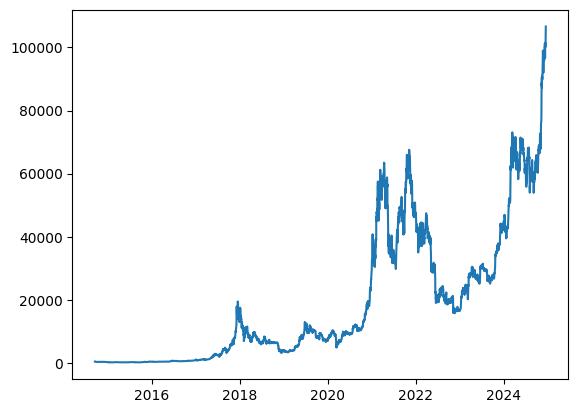

In [48]:
plt.plot(df.index, df[('Adj Close', 'BTC-USD')])

In [49]:
#split in train test
to_row = int(len(df)*0.9)#give 90% data

training_data = list(df[0:to_row]['Adj Close', 'BTC-USD'])
testing_data = list(df[to_row:]['Adj Close', 'BTC-USD'])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

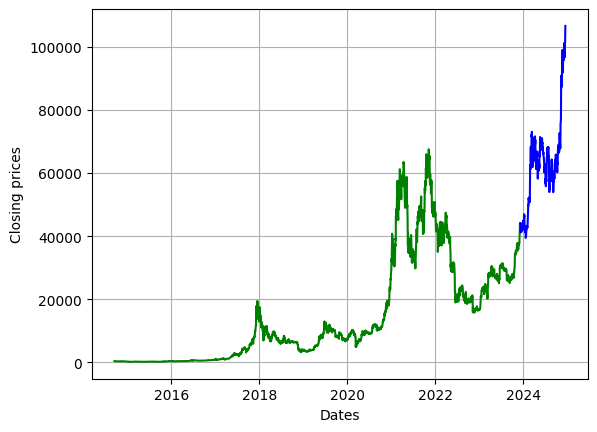

In [50]:
#graph of splitted data
plt.Figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close', 'BTC-USD'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close', 'BTC-USD'],'blue',label='Test data')
plt.legend

In [51]:
model_predictions = []
n_test_obser = len(testing_data)

In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming training_data is initialized as a list or Series
for i in range(n_test_obser):
    # Train the ARIMA model on the updated training data
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]  # Predicted value (forecasted value)
    model_predictions.append(yhat)  # Store the prediction

    # Append the actual test value to training data for the next iteration
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)


In [53]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3743
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -30888.539
Date:                Mon, 16 Dec 2024   AIC                          61787.078
Time:                        21:53:10   BIC                          61818.215
Sample:                             0   HQIC                         61798.152
                               - 3743                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0405      0.009     -4.658      0.000      -0.057      -0.023
ar.L2          0.0313      0.009      3.486      0.000       0.014       0.049
ar.L3          0.0007      0.009      0.078      0.9

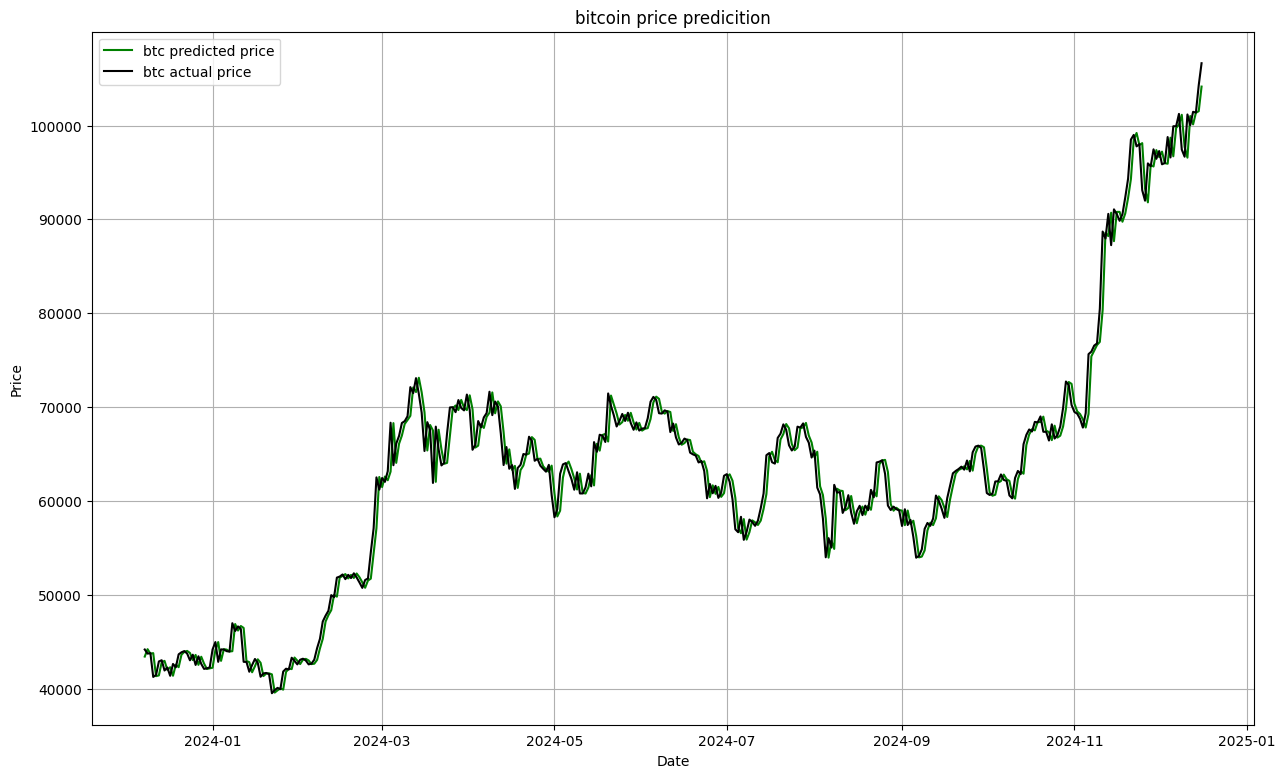

In [55]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range,model_predictions,color = 'green',label='btc predicted price')
plt.plot(date_range,testing_data,color = 'black',label='btc actual price')

plt.title('bitcoin price predicition')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()